In [573]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [574]:
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
# tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')
# tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VEOEY CWST SRCL CWY.AX TMRAY SYM GXO AUTO.OL ZBRA KGX.DE CGNX DAIUF MANH BKW.SW ENLAY NEE IBDRY DNNGY FSLR ENR.DE')
tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VIE.PA CWST CWY.AX TOM.OL SYM GXO AUTO.OL ZBRA KGX.DE CGNX MANH BKW.SW ENEL.MI NEE IBE.MC ORSTED.CO FSLR ENR.DE')

In [575]:
# df = tickers.download(period="1y")
df = tickers.download(start="2010-01-01", end="2025-01-01", interval="1d")

[*********************100%***********************]  26 of 26 completed


In [576]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/ticker_download_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)

In [577]:
# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:

    # Print ticker for debugging
    print(f"Processing {ticker}...")

    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    try:
        info = t.info
        # print(f"Sucessful fetching info for {ticker}: {info}")
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        continue
    
    # hist = t.history(period="2y")
    hist = t.history(start = '2010-01-01', end = '2025-01-01')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

Processing ECL...
Processing BMI...
Processing VLTO...
Processing XYL...
Processing GF.SW...
Processing WM...
Processing GFL...
Processing CLH...
Processing VIE.PA...
Processing CWST...
Processing CWY.AX...
Processing TOM.OL...
Processing SYM...
Processing GXO...
Processing AUTO.OL...
Processing ZBRA...
Processing KGX.DE...
Processing CGNX...
Processing MANH...
Processing BKW.SW...
Processing ENEL.MI...
Processing NEE...
Processing IBE.MC...
Processing ORSTED.CO...
Processing FSLR...
Processing ENR.DE...


In [578]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$66.74B,1.34M,515.10,N/A,515.103022
1,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.4B,0.16M,1146.26,N/A,1146.256674
2,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$22.23B,1.82M,31.56,N/A,31.555784
3,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$26.54B,1.15M,471.55,N/A,471.545692
4,GF.SW,GEORG FISCHER N,Georg Fischer AG engages in the provision of p...,$4.64B,0.3M,586.38,N/A,586.377412
5,WM,"Waste Management, Inc.","Waste Management, Inc., through its subsidiari...",$92.29B,2.18M,772.28,N/A,772.275595
6,GFL,GFL Environmental Inc. Subordin,GFL Environmental Inc. provides non-hazardous ...,$17.83B,1.2M,167.84,N/A,167.844880
7,CLH,"Clean Harbors, Inc.","Clean Harbors, Inc. provides environmental and...",$10.86B,0.43M,658.66,N/A,658.661633
8,VIE.PA,VEOLIA ENVIRON.,Veolia Environnement SA designs and provides w...,$21.72B,2.34M,138.13,N/A,138.133500
9,CWST,"Casella Waste Systems, Inc.","Casella Waste Systems, Inc., together with its...",$7.29B,0.21M,2332.41,N/A,2332.413790


In [579]:
# We only need closing prices
df = df['Close']
df

# Save the dataframe to CSV with the timestamp included
filename = f'data/data_close_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)
df

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,16.992754,3.936836,30.334999,4.350000,0.893446,37.996128,1.758588,NaN,...,6.202500,8.537421,NaN,NaN,11.232940,11.384371,NaN,23.048235,NaN,28.670000
2010-01-05,NaN,NaN,17.498569,3.843514,30.264999,4.300000,0.931874,37.416729,1.755353,NaN,...,6.117500,8.454053,NaN,NaN,11.272492,11.472131,NaN,22.947027,NaN,28.620001
2010-01-06,NaN,NaN,17.473473,3.795770,30.525000,4.340000,0.938278,37.307575,1.785543,NaN,...,6.025000,8.537421,NaN,NaN,11.193389,11.640336,NaN,22.940279,NaN,28.400000
2010-01-07,NaN,NaN,17.552908,3.804452,30.834999,4.360000,0.928672,37.710621,1.802795,NaN,...,5.942500,8.513375,NaN,NaN,11.074728,11.776849,NaN,22.994255,NaN,27.690001
2010-01-08,NaN,NaN,17.506929,3.808791,31.965000,4.410000,0.883839,38.029720,1.810343,NaN,...,5.932500,8.439626,NaN,NaN,10.758309,12.237588,NaN,23.102215,NaN,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,NaN,NaN,219.640457,36.601562,230.940002,106.239998,2.650687,240.118759,NaN,NaN,...,282.269989,72.314156,NaN,24.549999,NaN,26.799999,103.260002,204.620865,117.784721,395.440002
2024-12-26,NaN,NaN,219.590530,36.850960,231.330002,107.550003,NaN,238.742310,NaN,NaN,...,279.299988,71.778564,NaN,24.820000,NaN,NaN,103.639160,204.262192,118.103729,396.850006
2024-12-27,11.36,151.699997,215.097885,35.953133,229.570007,106.160004,2.660578,237.146439,6.641284,50.080002,...,275.190002,71.520691,330.299988,24.080000,149.199997,26.940001,102.890823,203.265900,117.166634,389.070007


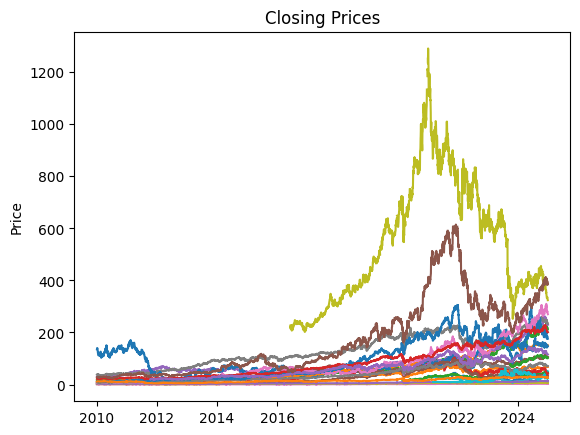

In [580]:
# Plot closing prices
plt.plot(df)
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 295
Number of rows total: 3877
Number of columns before dropping bad columns: 26
Number of columns after dropping bad columns: 20
Number of rows in dataframe without missing values after dropping bad columns: 2027
Number of rows total after dropping bad columns: 3877


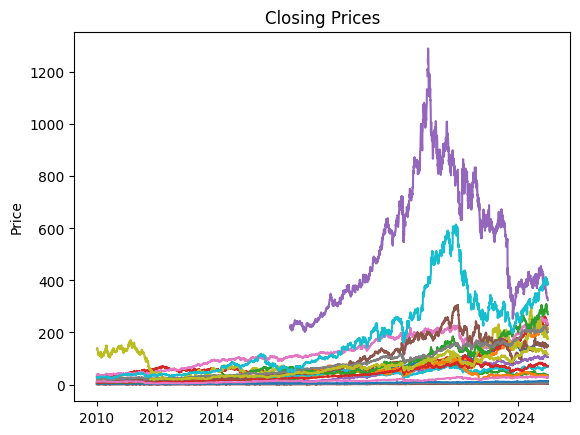

In [581]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

# Print number of columns before dropping columns with too many NaN values
print(f"Number of columns before dropping bad columns: {df.shape[1]}")

# Drop columns with more than 60% NaN values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Print number of columns after dropping columns with too many NaN values
print(f"Number of columns after dropping bad columns: {df.shape[1]}")

# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values after dropping bad columns: {df.dropna().shape[0]}")
print(f"Number of rows total after dropping bad columns: {df.shape[0]}")

# Plot closing prices
plt.plot(df)
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 2027
Number of rows total: 3877


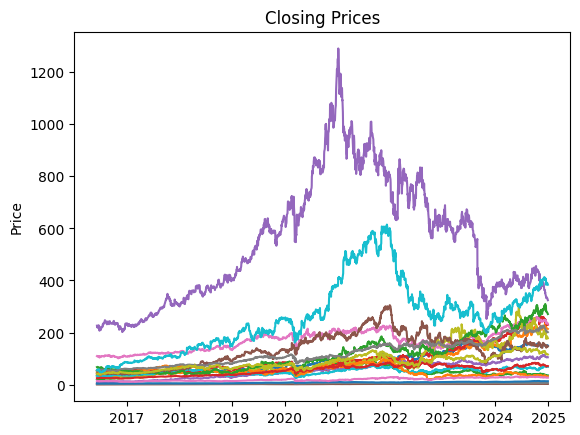

In [582]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

df = df.dropna()

# Plot closing prices
plt.plot(df)
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()


# Normalising (ignore)

In [583]:
df_normalized_closed = df - df.iloc[0]
df_normalized_closed

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-10,-0.082031,-0.824173,-0.378048,-0.809998,-0.120000,-0.008390,-0.489525,-0.083662,-1.940002,-0.400200,-0.112281,-0.887207,-1.110001,-0.030140,-5.266129,-0.227646,-0.345569,0.000000,-0.341736,-0.239998
2016-06-14,-0.328133,-2.265274,-1.306837,-1.349998,-0.080000,-0.033564,-1.305389,-0.162543,-2.560001,-1.663979,-0.280704,-2.322788,-1.620003,0.200914,-7.548111,-2.276413,-0.856877,0.306522,-0.584553,-1.009998
2016-06-15,0.000000,-2.472473,-1.166822,-1.489998,-0.060000,-0.033564,-1.985321,-0.126689,-2.250000,-1.326973,-0.246471,-2.260368,-1.590004,-0.028133,-3.949600,-1.252037,-0.825141,0.153259,-0.638512,-0.340000
2016-06-16,-0.041012,-2.412594,-1.283503,-2.199997,0.050000,-0.041954,-1.332611,-0.114737,-2.060001,-2.232679,-0.251265,-3.308079,-2.080002,0.174795,-6.319336,-2.845520,-0.846298,0.672623,-0.836357,0.360001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,111.626247,182.857899,15.124949,180.250008,97.799999,1.969530,125.421822,4.133416,125.430004,33.709454,8.818749,-14.356815,215.320007,44.290348,105.657990,98.634354,12.386472,151.454662,74.432178,329.109997
2024-12-20,112.126247,182.119099,14.825670,177.180000,98.380001,1.979420,128.174690,4.138266,131.939999,33.809452,8.888750,-14.176815,213.040009,46.174824,106.157990,107.434357,12.356471,151.753551,75.139980,336.780010
2024-12-23,115.126247,181.270481,15.204756,175.260002,97.219997,2.009092,128.972633,4.131476,135.910000,34.359455,8.918749,-13.896816,211.600006,46.988125,108.257996,104.734360,12.286471,149.731060,75.508839,334.389996


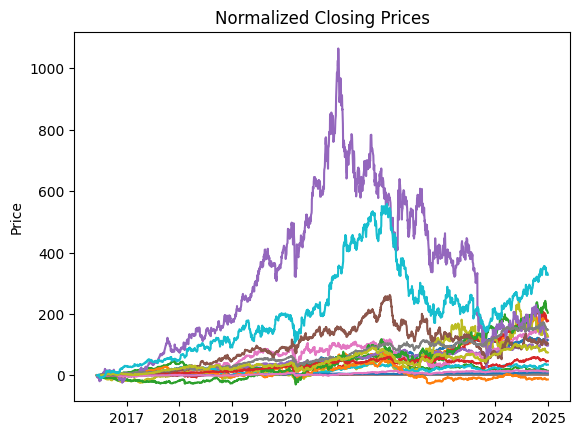

In [584]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
# plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [585]:
# Add a new column to the DataFrame with daily differences
df_diff = df.diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-10,-0.082031,-0.824173,-0.378048,-0.809998,-0.120000,-0.008390,-0.489525,-0.083662,-1.940002,-0.400200,-0.112281,-0.887207,-1.110001,-0.030140,-5.266129,-0.227646,-0.345569,0.000000,-0.341736,-0.239998
2016-06-14,-0.246101,-1.441101,-0.928789,-0.540001,0.040000,-0.025173,-0.815865,-0.078881,-0.619999,-1.263779,-0.168422,-1.435581,-0.510002,0.231054,-2.281982,-2.048767,-0.511309,0.306522,-0.242817,-0.770000
2016-06-15,0.328133,-0.207199,0.140015,-0.139999,0.020000,0.000000,-0.679932,0.035855,0.310001,0.337006,0.034233,0.062420,0.029999,-0.229048,3.598511,1.024376,0.031736,-0.153263,-0.053959,0.669998
2016-06-16,-0.041012,0.059879,-0.116680,-0.709999,0.110000,-0.008390,0.652710,0.011952,0.189999,-0.905706,-0.004794,-1.047710,-0.489998,0.202929,-2.369736,-1.593483,-0.021157,0.519363,-0.197845,0.700001
2016-06-17,-0.328136,-0.193394,0.051342,0.199997,-0.130000,0.004195,-0.336395,0.053783,0.130001,0.695070,0.067781,0.454754,-0.699997,0.050232,5.002777,0.455284,0.017631,-0.647076,0.143875,0.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.500000,-0.988373,0.458893,-1.449997,-0.559998,-0.059344,-2.124512,-0.111545,-8.389999,-1.349998,-0.185000,-0.910000,0.910004,-0.743874,-6.500000,-6.600006,-0.190001,0.099640,-0.488480,1.899994
2024-12-20,0.500000,-0.738800,-0.299278,-3.070007,0.580002,0.009891,2.752869,0.004850,6.509995,0.099998,0.070001,0.180000,-2.279999,1.884476,0.500000,8.800003,-0.030001,0.298889,0.707802,7.670013
2024-12-23,3.000000,-0.848618,0.379086,-1.919998,-1.160004,0.029672,0.797943,-0.006790,3.970001,0.550003,0.030000,0.279999,-1.440002,0.813301,2.100006,-2.699997,-0.070000,-2.022491,0.368858,-2.390015


In [586]:
# Add a new column to the DataFrame with daily difference relative to the previous day
df_diff_relative = df.pct_change()
# Drop the first row (NaN)
df_diff_relative = df_diff_relative.dropna()
df_diff_relative


Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-10,-0.002326,-0.023384,-0.018125,-0.015183,-0.015810,-0.012499,-0.004471,-0.033964,-0.038454,-0.011809,-0.026983,-0.019552,-0.016513,-0.001210,-0.023256,-0.005249,-0.023926,0.000000,-0.008207,-0.004266
2016-06-14,-0.006993,-0.041867,-0.045351,-0.010278,0.005355,-0.037976,-0.007484,-0.033149,-0.012781,-0.037736,-0.041596,-0.032268,-0.007714,0.009287,-0.010318,-0.047493,-0.036268,0.005749,-0.005880,-0.013745
2016-06-15,0.009390,-0.006283,0.007161,-0.002692,0.002663,0.000000,-0.006284,0.015584,0.006473,0.010457,0.008822,0.001450,0.000457,-0.009122,0.016440,0.024931,0.002336,-0.002858,-0.001314,0.012127
2016-06-16,-0.001163,0.001827,-0.005925,-0.013691,0.014608,-0.013157,0.006071,0.005115,0.003942,-0.027813,-0.001225,-0.024300,-0.007466,0.008156,-0.010651,-0.037838,-0.001554,0.009713,-0.004826,0.012518
2016-06-17,-0.009313,-0.005890,0.002623,0.003910,-0.017016,0.006666,-0.003110,0.022901,0.002687,0.021956,0.017335,0.010810,-0.010746,0.002003,0.022727,0.011236,0.001297,-0.011985,0.003526,0.005475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.003392,-0.004511,0.012918,-0.006169,-0.005285,-0.021978,-0.008962,-0.016628,-0.045531,-0.019579,-0.014052,-0.028500,0.003231,-0.010635,-0.019197,-0.044415,-0.007032,0.000487,-0.004191,0.004955
2024-12-20,0.003404,-0.003387,-0.008317,-0.013142,0.005503,0.003745,0.011718,0.000735,0.037014,0.001479,0.005393,0.005803,-0.008070,0.027232,0.001506,0.061972,-0.001118,0.001460,0.006098,0.019903
2024-12-23,0.020353,-0.003904,0.010623,-0.008329,-0.010947,0.011194,0.003357,-0.001029,0.021767,0.008124,0.002299,0.008974,-0.005138,0.011441,0.006314,-0.017904,-0.002612,-0.009862,0.003159,-0.006081


# Rolling 60-day Volatility (ignore)

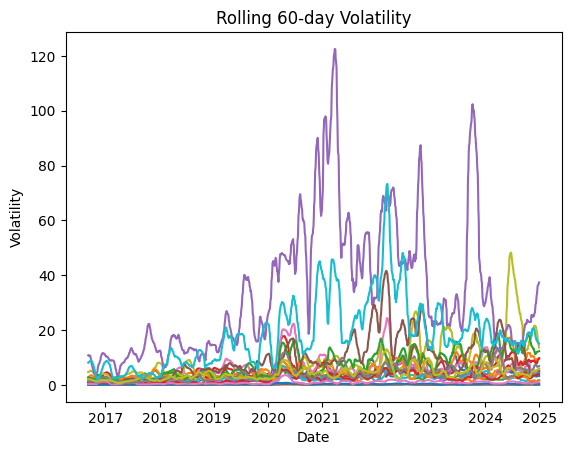

In [587]:
df_volatility = df.rolling(window=60).std()
df_volatility

# Plot volatility
plt.plot(df_volatility)
plt.title('Rolling 60-day Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

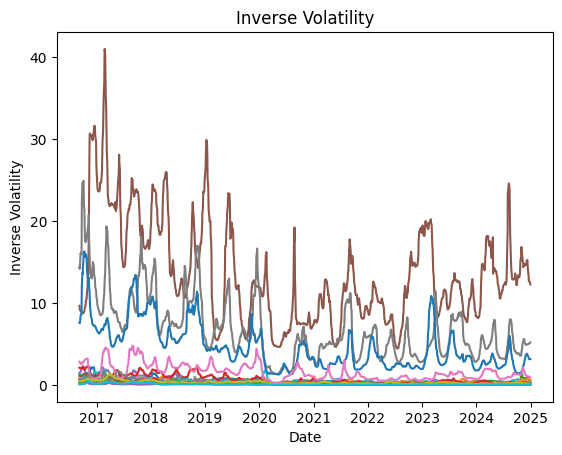

In [588]:
df_inverse_volatility = 1 / df_volatility
df_inverse_volatility

# Plot inverse volatility
plt.plot(df_inverse_volatility)
plt.title('Inverse Volatility')
plt.ylabel('Inverse Volatility')
plt.xlabel('Date')
plt.show()

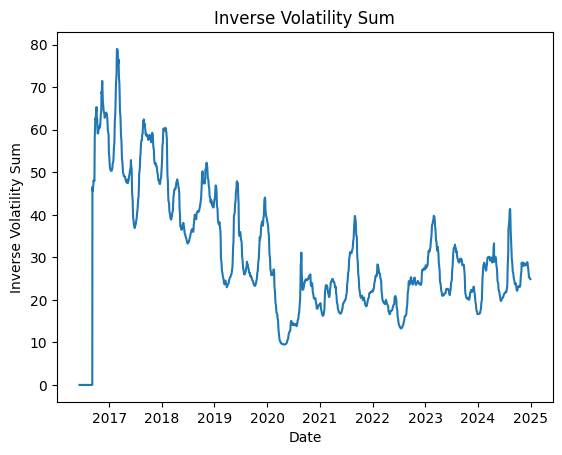

In [589]:
df_inverse_volatility_sum = df_inverse_volatility.sum(axis=1)
df_inverse_volatility_sum

# Plot inverse volatility sum
plt.plot(df_inverse_volatility_sum)
plt.title('Inverse Volatility Sum')
plt.ylabel('Inverse Volatility Sum')
plt.xlabel('Date')
plt.show()

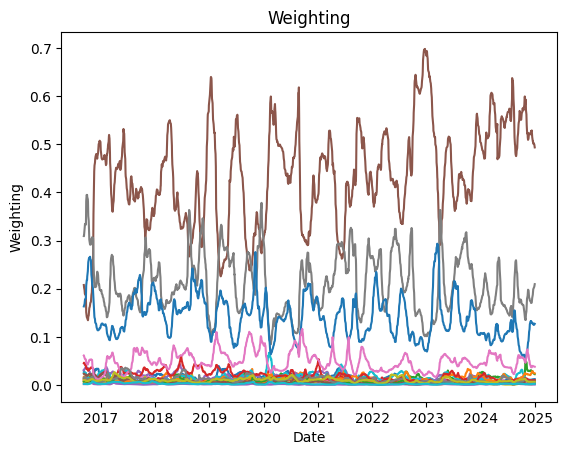

In [590]:
df_weighting = df_inverse_volatility.div(df_inverse_volatility_sum, axis=0)
df_weighting
# Plot weighting
plt.plot(df_weighting)
plt.title('Weighting')
plt.ylabel('Weighting')
plt.xlabel('Date')
plt.show()


In [591]:
df_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.012057,0.004104,0.025431,0.004534,0.007840,0.502981,0.007337,0.195302,0.002161,0.008083,0.127468,0.026699,0.003202,0.009765,0.001097,0.007340,0.039390,0.005795,0.006941,0.002473
2024-12-20,0.012084,0.004168,0.024653,0.004434,0.008095,0.501229,0.007250,0.198930,0.002341,0.008160,0.126600,0.025742,0.003245,0.009807,0.001095,0.007586,0.039228,0.005907,0.006920,0.002526
2024-12-23,0.012144,0.004178,0.023927,0.004300,0.008259,0.502164,0.007109,0.201302,0.002556,0.008117,0.124869,0.025215,0.003250,0.009856,0.001089,0.007625,0.038729,0.005897,0.006854,0.002560


In [592]:
# Drop rows before 2023-01-01
df_weighting = df_weighting.loc['2023-01-01':]
df_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.007869,0.004733,0.013304,0.011256,0.010019,0.686347,0.007213,0.103938,0.002322,0.011577,0.071298,0.012453,0.005962,0.008116,0.001479,0.002922,0.023026,0.009089,0.004277,0.002798
2023-01-04,0.007379,0.004728,0.012978,0.010902,0.009902,0.693351,0.007019,0.101365,0.002288,0.011497,0.069560,0.012022,0.006319,0.007887,0.001423,0.002844,0.022651,0.008832,0.004255,0.002800
2023-01-05,0.007302,0.004913,0.013188,0.010631,0.010309,0.690746,0.007033,0.101928,0.002316,0.011852,0.070109,0.011753,0.006573,0.007923,0.001448,0.002836,0.023151,0.008787,0.004394,0.002809
2023-01-06,0.007082,0.005184,0.013451,0.010748,0.011034,0.685163,0.007150,0.102599,0.002364,0.012347,0.071854,0.011620,0.006874,0.008037,0.001499,0.002882,0.023716,0.008995,0.004600,0.002800
2023-01-09,0.006914,0.005510,0.013534,0.010872,0.011659,0.678157,0.007213,0.104215,0.002402,0.012821,0.074410,0.011304,0.007061,0.008147,0.001567,0.002939,0.024561,0.009135,0.004817,0.002763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.012057,0.004104,0.025431,0.004534,0.007840,0.502981,0.007337,0.195302,0.002161,0.008083,0.127468,0.026699,0.003202,0.009765,0.001097,0.007340,0.039390,0.005795,0.006941,0.002473
2024-12-20,0.012084,0.004168,0.024653,0.004434,0.008095,0.501229,0.007250,0.198930,0.002341,0.008160,0.126600,0.025742,0.003245,0.009807,0.001095,0.007586,0.039228,0.005907,0.006920,0.002526
2024-12-23,0.012144,0.004178,0.023927,0.004300,0.008259,0.502164,0.007109,0.201302,0.002556,0.008117,0.124869,0.025215,0.003250,0.009856,0.001089,0.007625,0.038729,0.005897,0.006854,0.002560


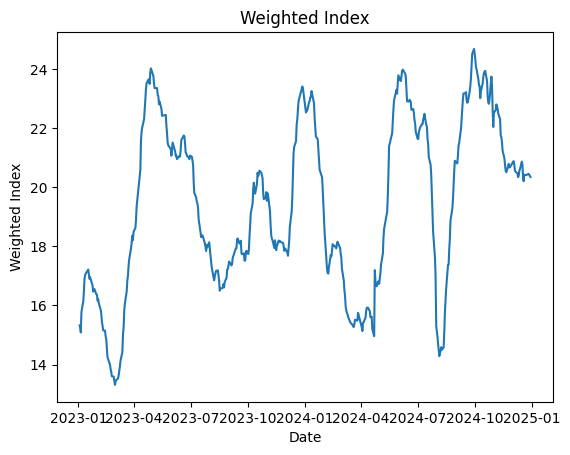

In [593]:
# Create a index with help of the closing prices and the weighting
df_weighted_index = (df.loc['2023-01-01':] * df_weighting).sum(axis=1)
df_weighted_index

# Plot weighted index
plt.plot(df_weighted_index)
plt.title('Weighted Index')
plt.ylabel('Weighted Index')
plt.xlabel('Date')
plt.show()

[*********************100%***********************]  1 of 1 completed


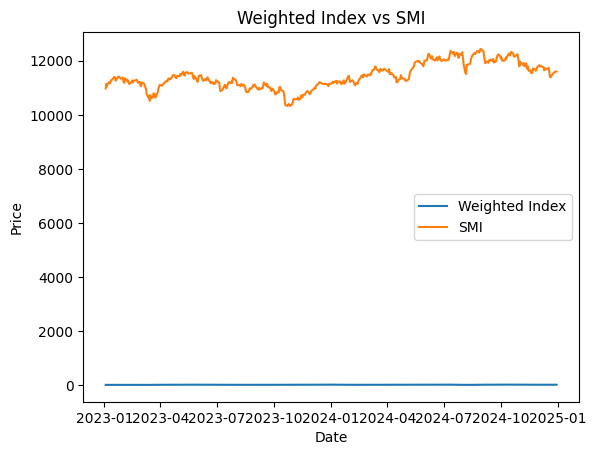

In [594]:
# Compare the weighted index with SMI
smi = yf.download('^SSMI', start='2023-01-01', end='2025-01-01', interval='1d')['Close']
smi = smi.reindex(df_weighted_index.index, method='ffill')
smi = smi.dropna()

# Plot weighted index and SMI
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()



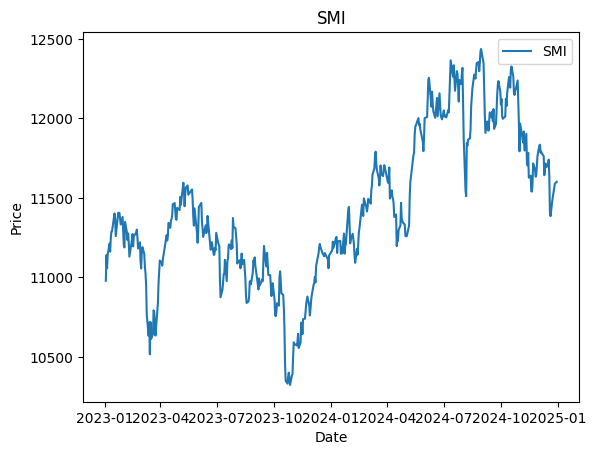

In [595]:
# Plot SMI 
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [596]:
smi = (smi / smi.iloc[0])  # Normalize to start at 0
df_weighted_index = (df_weighted_index / df_weighted_index.iloc[0])  # Normalize to start at 0
df_weighted_index

Date
2023-01-03    1.000000
2023-01-04    0.995696
2023-01-05    0.984410
2023-01-06    1.029045
2023-01-09    1.053316
                ...   
2024-12-19    1.318482
2024-12-20    1.332801
2024-12-23    1.332019
2024-12-27    1.334780
2024-12-30    1.327824
Length: 471, dtype: float64

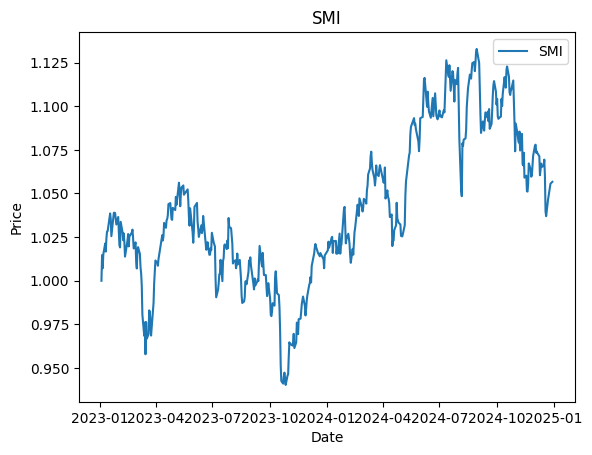

In [597]:
# Plot weighted index and S&P 500  
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

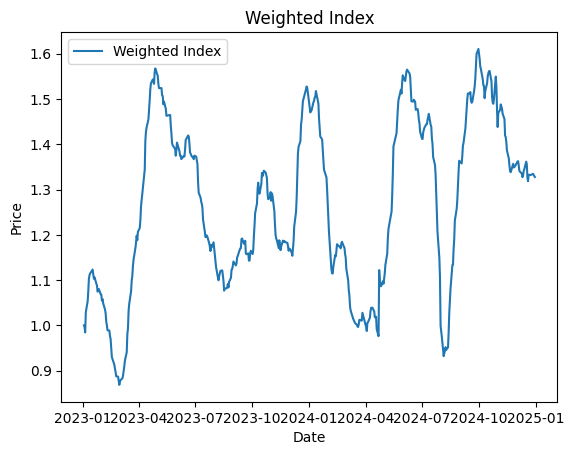

In [598]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.title('Weighted Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

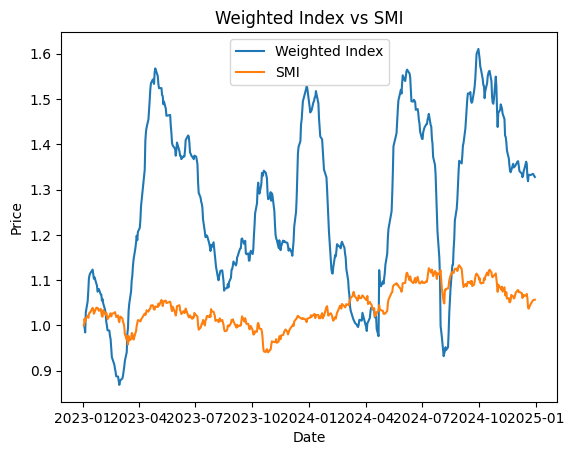

In [599]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Fixed weighting

In [600]:
# Split data into training and test sets
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df[train_size:]
df_train


Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-09,35.273746,35.245083,20.858110,53.349998,7.590000,0.671267,109.500374,2.463249,50.450001,33.890545,4.161251,45.376816,67.220001,24.909458,226.442017,43.365646,14.443528,53.315647,41.637859,56.259998
2016-06-10,35.191715,34.420910,20.480062,52.540001,7.470000,0.662877,109.010849,2.379587,48.509998,33.490345,4.048969,44.489609,66.110001,24.879318,221.175888,43.138000,14.097960,53.315647,41.296124,56.020000
2016-06-14,34.945614,32.979809,19.551273,52.000000,7.510000,0.637703,108.194984,2.300706,47.889999,32.226566,3.880547,43.054028,65.599998,25.110373,218.893906,41.089233,13.586651,53.622169,41.053307,55.250000
2016-06-15,35.273746,32.772610,19.691288,51.860001,7.530000,0.637703,107.515053,2.336561,48.200001,32.563572,3.914780,43.116447,65.629997,24.881325,222.492416,42.113609,13.618387,53.468906,40.999348,55.919998
2016-06-16,35.232735,32.832489,19.574608,51.150002,7.640000,0.629313,108.167763,2.348512,48.389999,31.657866,3.909986,42.068737,65.139999,25.084253,220.122681,40.520126,13.597230,53.988270,40.801502,56.619999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,137.933685,120.237816,48.828442,142.559998,82.660004,2.288763,162.070938,4.952052,217.500000,68.154182,10.667645,34.852531,154.850006,72.713615,583.400024,171.698074,26.138397,158.204269,102.225952,318.000000
2023-04-03,137.070389,121.994698,48.552525,140.919998,81.860001,2.288763,162.550735,4.930051,208.490005,67.529350,10.551542,34.470825,156.639999,72.326828,583.200012,165.991058,26.129192,158.882980,101.991631,311.649994
2023-04-04,137.933685,119.398865,47.636063,136.250000,81.180000,2.288763,161.424759,4.915090,208.139999,67.144844,10.611917,33.912952,154.970001,72.789070,577.799988,165.454514,26.258045,158.553345,98.789146,308.709991


In [601]:
df_test

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2023-04-12,141.578659,120.583260,47.665623,140.889999,84.879997,2.356079,160.817703,5.273271,207.889999,63.203625,10.927720,33.159328,153.009995,74.138062,596.599976,168.722610,26.902300,160.463348,101.044563,301.410004
2023-04-13,141.194977,120.849762,48.444118,143.630005,85.690002,2.346463,163.265472,5.066459,211.259995,64.405220,10.834837,33.697628,155.899994,74.383324,608.599976,167.698288,26.810263,161.772278,102.108795,306.170013
2023-04-14,141.194977,119.744308,48.365292,143.539993,84.480003,2.365696,160.935196,5.023337,208.399994,65.270363,10.649070,34.245720,156.369995,73.600349,608.400024,169.990860,26.718229,160.269470,101.972122,303.079987
2023-04-17,142.921539,119.349503,48.759460,143.309998,85.680000,2.384929,160.523972,5.033897,218.889999,66.327759,10.686223,34.989552,157.210007,74.090904,602.200012,166.576401,26.782656,160.366409,102.177155,300.459991
2023-04-18,142.921539,119.280403,48.670769,143.199997,86.050003,2.394546,160.856857,5.068219,219.479996,67.000648,10.700156,35.429981,157.789993,73.864494,587.799988,168.186066,26.764246,160.347031,101.728020,300.630005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,146.899994,218.102982,35.983059,233.600006,105.389999,2.640797,234.922195,6.596666,175.880005,67.599998,12.980000,31.020000,282.540009,69.199806,332.100006,142.000000,26.830000,204.770309,116.070038,385.369995
2024-12-20,147.399994,217.364182,35.683781,230.529999,105.970001,2.650687,237.675064,6.601516,182.389999,67.699997,13.050000,31.200001,280.260010,71.084282,332.600006,150.800003,26.799999,205.069199,116.777840,393.040009
2024-12-23,150.399994,216.515564,36.062866,228.610001,104.809998,2.680359,238.473007,6.594726,186.360001,68.250000,13.080000,31.480000,278.820007,71.897583,334.700012,148.100006,26.730000,203.046707,117.146698,390.649994


In [602]:
# Calculate the daily difference for the training set
df_train_diff = df_train.diff().dropna()
df_train_diff

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-10,-0.082031,-0.824173,-0.378048,-0.809998,-0.120000,-0.008390,-0.489525,-0.083662,-1.940002,-0.400200,-0.112281,-0.887207,-1.110001,-0.030140,-5.266129,-0.227646,-0.345569,0.000000,-0.341736,-0.239998
2016-06-14,-0.246101,-1.441101,-0.928789,-0.540001,0.040000,-0.025173,-0.815865,-0.078881,-0.619999,-1.263779,-0.168422,-1.435581,-0.510002,0.231054,-2.281982,-2.048767,-0.511309,0.306522,-0.242817,-0.770000
2016-06-15,0.328133,-0.207199,0.140015,-0.139999,0.020000,0.000000,-0.679932,0.035855,0.310001,0.337006,0.034233,0.062420,0.029999,-0.229048,3.598511,1.024376,0.031736,-0.153263,-0.053959,0.669998
2016-06-16,-0.041012,0.059879,-0.116680,-0.709999,0.110000,-0.008390,0.652710,0.011952,0.189999,-0.905706,-0.004794,-1.047710,-0.489998,0.202929,-2.369736,-1.593483,-0.021157,0.519363,-0.197845,0.700001
2016-06-17,-0.328136,-0.193394,0.051342,0.199997,-0.130000,0.004195,-0.336395,0.053783,0.130001,0.695070,0.067781,0.454754,-0.699997,0.050232,5.002777,0.455284,0.017631,-0.647076,0.143875,0.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.863297,2.043114,0.837620,3.800003,1.870003,-0.019233,2.202972,0.014961,4.179993,1.153534,0.074306,-0.303402,2.850006,0.462257,5.900024,2.458405,0.128851,1.590073,2.245636,8.890015
2023-04-03,-0.863297,1.756882,-0.275917,-1.639999,-0.800003,0.000000,0.479797,-0.022001,-9.009995,-0.624832,-0.116103,-0.381706,1.789993,-0.386787,-0.200012,-5.707016,-0.009205,0.678711,-0.234322,-6.350006
2023-04-04,0.863297,-2.595833,-0.916462,-4.669998,-0.680000,0.000000,-1.125977,-0.014961,-0.350006,-0.384506,0.060375,-0.557873,-1.669998,0.462242,-5.400024,-0.536545,0.128853,-0.329636,-3.202484,-2.940002


In [603]:
# Define a new dataframe to store the volatility and inverse volatility
df_train_mini = pd.DataFrame()

# Calculate the volatility for each column in the old dataframe
df_train_mini['Volatility'] = df_train_diff.std()

# Calculate the inverse volatility
df_train_mini['Inverse Volatility'] = 1 / df_train_mini['Volatility']

# Calculate the sum of the inverse volatilities
sum_inverse_volatility = df_train_mini['Inverse Volatility'].sum()

# Calculate the volatility weighting for each stock based on the inverse volatility and sum of all inverse volatilities
df_train_mini['Volatility Weighting'] = df_train_mini['Inverse Volatility'] / sum_inverse_volatility

# Calculate the volatility weighting in percentage (multiply by 100 & round to 2 decimal places)
df_train_mini['Volatility Weighting (%)'] = (df_train_mini['Volatility Weighting'] * 100).round(2)

# Print the result
df_train_mini

,Volatility,Inverse Volatility,Volatility Weighting,Volatility Weighting (%)
Ticker,,,,
BKW.SW,1.175780,0.850499,0.013605,1.36
BMI,1.448411,0.690412,0.011044,1.10
CGNX,1.338898,0.746883,0.011948,1.19
CLH,1.686531,0.592933,0.009485,0.95
CWST,1.001137,0.998864,0.015979,1.60
CWY.AX,0.037467,26.690188,0.426956,42.70
ECL,2.853741,0.350417,0.005606,0.56
ENEL.MI,0.073856,13.539813,0.216593,21.66
FSLR,2.469055,0.405013,0.006479,0.65


In [604]:
# Print number of stocks:
print(f"Number of stocks: {len(df_train_mini)}")
# Print name of stock with lowest and highest volatility
print(f"Lowest weighting (%): {df_train_mini['Volatility Weighting (%)'].idxmin()} ({df_train_mini['Volatility Weighting (%)'].min()})")
print(f"Highest weighting (%): {df_train_mini['Volatility Weighting (%)'].idxmax()} ({df_train_mini['Volatility Weighting (%)'].max()})")
# Print sum of final weighting to verify correctness
print(f"Sum of final weighting: {df_train_mini['Volatility Weighting'].sum()}")

Number of stocks: 20
Lowest weighting (%): ORSTED.CO (0.11)
Highest weighting (%): CWY.AX (42.7)
Sum of final weighting: 1.0


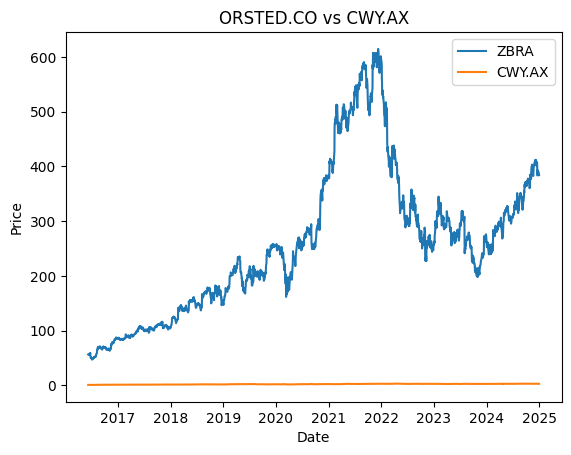

In [605]:
# Plot ORSTED.CO and CWY.AX
plt.plot(df['ZBRA'], label='ZBRA')
plt.plot(df['CWY.AX'], label='CWY.AX')
plt.title('ORSTED.CO vs CWY.AX')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()

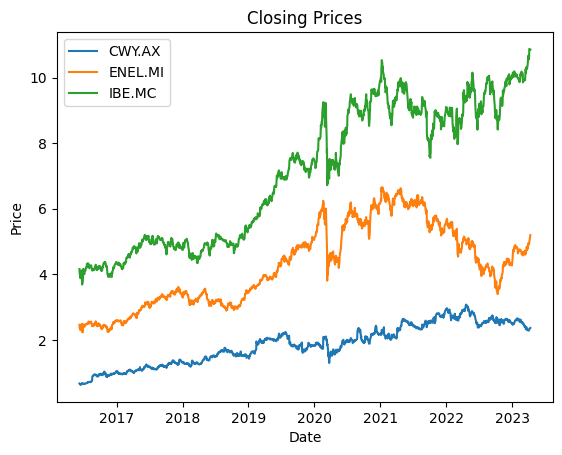

In [606]:
# Plot columns CWY.AX, ENEL.MI, and IBE.MC
plt.plot(df_train['CWY.AX'], label='CWY.AX')
plt.plot(df_train['ENEL.MI'], label='ENEL.MI')
plt.plot(df_train['IBE.MC'], label='IBE.MC')
plt.title('Closing Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

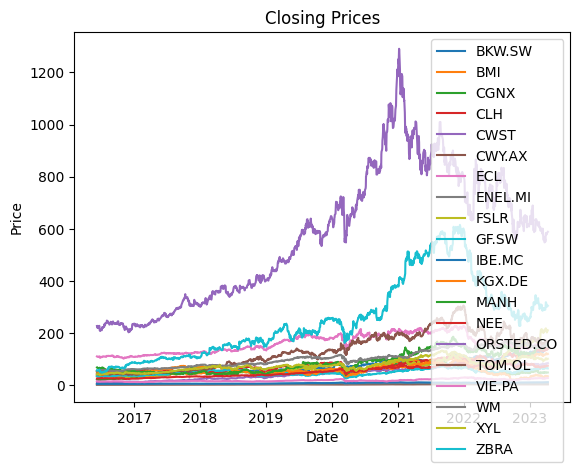

In [607]:
# Plot all stocks
plt.plot(df_train)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(df_train.columns)
plt.show()

# Performance of test data

In [608]:
# Create a dataframe for the fixed weighting of the same size as df_test
df_fixed_weighting = df_test.copy()
# Fill the dataframe with the fixed weighting from df_train_mini
for day in range(len(df_fixed_weighting)):
    df_fixed_weighting.iloc[day] = df_train_mini['Volatility Weighting'].values

df_fixed_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2023-04-12,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
2023-04-13,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
2023-04-14,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
2023-04-17,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
2023-04-18,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
2024-12-20,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423
2024-12-23,0.013605,0.011044,0.011948,0.009485,0.015979,0.426956,0.005606,0.216593,0.006479,0.018587,0.149907,0.012242,0.006895,0.016996,0.001126,0.004569,0.047266,0.011258,0.011036,0.002423


In [609]:
# Created weighted index
df_fixed_weighted_index = (df_test * df_fixed_weighting).sum(axis=1)
df_fixed_weighted_index

Date
2023-04-12    22.816842
2023-04-13    22.931048
2023-04-14    22.829850
2023-04-17    22.972766
2023-04-18    22.998684
                ...    
2024-12-19    27.267093
2024-12-20    27.405169
2024-12-23    27.430058
2024-12-27    27.439487
2024-12-30    27.251038
Length: 406, dtype: float64

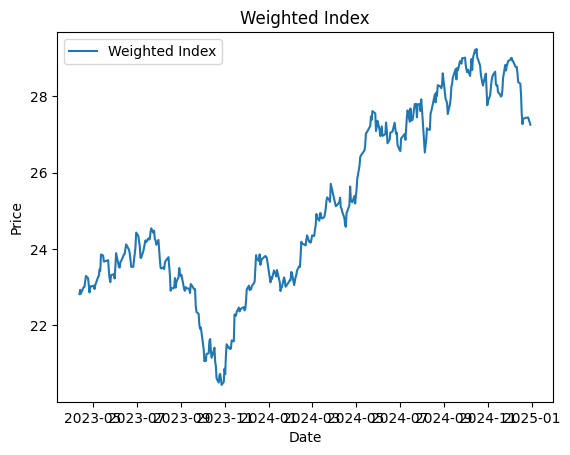

In [610]:
# Plot weighted index
plt.plot(df_fixed_weighted_index, label='Weighted Index')
plt.title('Weighted Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()


In [611]:
# Compare with SMI, S&P 500, and DJIA
smi = yf.download('^SSMI', start=df_weighted_index.index[0], end=df_weighted_index.index[-1], interval='1d')['Close']
smi = smi.reindex(df_fixed_weighted_index.index, method='ffill')
sp500 = yf.download('^GSPC', start=df_weighted_index.index[0], end=df_weighted_index.index[-1], interval='1d')['Close']
sp500 = sp500.reindex(df_fixed_weighted_index.index, method='ffill')
djia = yf.download('^DJI', start=df_weighted_index.index[0], end=df_weighted_index.index[-1], interval='1d')['Close']
djia = djia.reindex(df_fixed_weighted_index.index, method='ffill')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


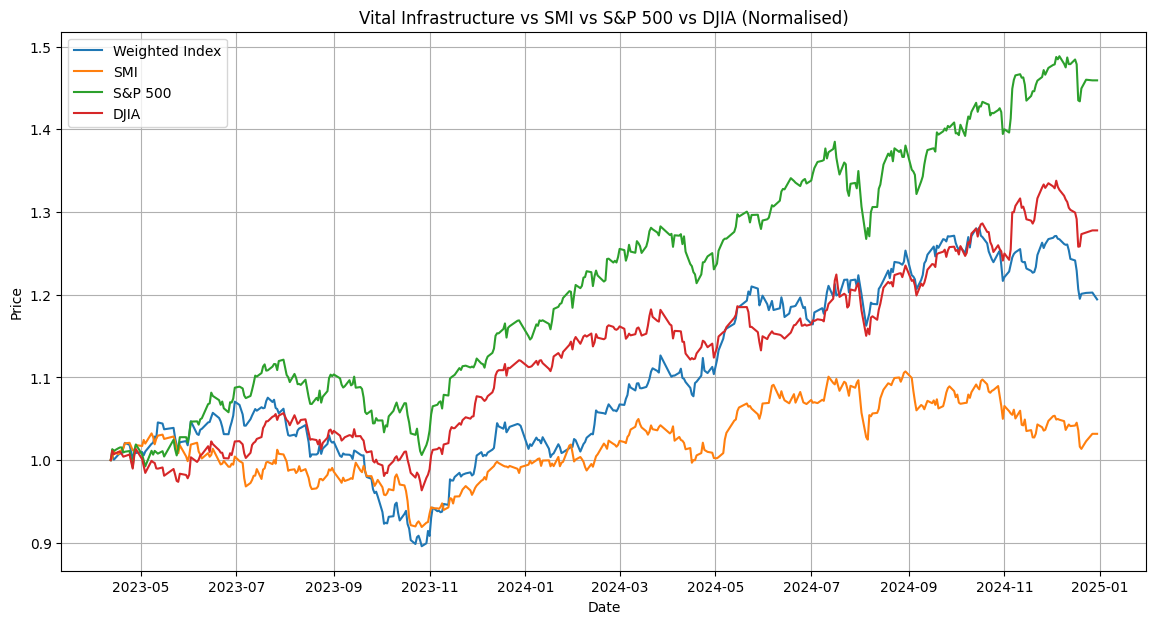

In [612]:
# Normalize to start at 1
smi = (smi / smi.iloc[0])  # Normalize to start at 1
sp500 = (sp500 / sp500.iloc[0])  # Normalize to start at 1
djia = (djia / djia.iloc[0])  # Normalize to start at 1
df_fixed_weighted_index = (df_fixed_weighted_index / df_fixed_weighted_index.iloc[0])  # Normalize to start at 1

# Plot weighted index, SMI, S&P 500, and DJIA
plt.figure(figsize=(14, 7))
plt.plot(df_fixed_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.plot(sp500, label='S&P 500')
plt.plot(djia, label='DJIA')
plt.title('Vital Infrastructure vs SMI vs S&P 500 vs DJIA (Normalised)')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

In [613]:
# 